## Preprocessing

In [1]:

#  Import and read the charity_data.csv.
from google.colab import files
uploaded=files.upload()



Saving charity_data.csv to charity_data.csv


In [123]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [23]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN','NAME'], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [25]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Choose a cutoff value and create a list of application types to be replaced
cut_off = 150
s = application_df['APPLICATION_TYPE'].value_counts()

# use the variable name `application_types_to_replace`
application_types_to_replace   =  s.loc[s<cut_off].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [27]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C1570        1
C1820        1
C4200        1
C2170        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [28]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classify_value_counts = application_df['CLASSIFICATION'].value_counts()
classify_value_counts.loc[classify_value_counts>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C2400        6
C1720        6
C1600        5
C1257        5
C2710        3
C1260        3
C0           3
C1267        2
C3200        2
C1246        2
C1256        2
C1234        2
Name: CLASSIFICATION, dtype: int64

In [29]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

cut_off = 100
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_value_counts.loc[classification_value_counts < cut_off].index
classifications_to_replace
# # Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [30]:
y = application_df['IS_SUCCESSFUL'] 
y.value_counts()


1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [31]:
application_df.drop('IS_SUCCESSFUL', axis=1, inplace=True)

In [32]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df.dtypes
categorical_features = application_df.dtypes[application_df.dtypes =='object'].index
print(categorical_features)
print("Unique values in categorical data:", application_df[categorical_features].nunique().sum())

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'],
      dtype='object')
Unique values in categorical data: 48


In [33]:
# one hot encoding
X = pd.get_dummies(application_df, drop_first=True)
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,108590,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,6692,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,142590,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [34]:
X.shape

(34299, 43)

__48 unique values in categorical data - 7 categorical features + 2 integer fields = 43 features as shown in X.shape__

In [35]:
# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)


In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.7220494479863163
0.722798833819242


__Logistic regression gives model score of 0.72__

## Compile, Train and Evaluate the Model

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
input_dim = len(X.columns)
nn.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=input_dim))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=4, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 352       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam', metrics=["accuracy"])

In [42]:
# Train the model
model_fit = nn.fit(X_train_scaled,y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.6471 - accuracy: 0.6275
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5761 - accuracy: 0.7196
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5605 - accuracy: 0.7274
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7268
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7280
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7281
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5516 - accuracy: 0.7278
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7290
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5506 - accuracy: 0.7282
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5499 - accuracy: 0.7292

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5512 - accuracy: 0.7285
Loss: 0.551190972328186, Accuracy: 0.7285131216049194


In [ ]:
# Export our model to HDF5 file
nn.save("neural_network.h5")

# Model Optimization

__Attempt 1: Increase number of hidden layers__

In [44]:

nn1 = tf.keras.models.Sequential()

# First hidden layer
input_dim = len(X.columns)
nn1.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=input_dim))
# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=4, activation="relu"))
# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=4, activation="relu"))
# Fourth hidden layer
nn1.add(tf.keras.layers.Dense(units=4, activation="relu"))
# Output layer
nn1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 352       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [45]:
# compile and train
nn1.compile(loss='binary_crossentropy',optimizer='adam', metrics=["accuracy"])
model_fit = nn1.fit(X_train_scaled,y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6270 - accuracy: 0.6752
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5736 - accuracy: 0.7219
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5655 - accuracy: 0.7247
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5607 - accuracy: 0.7257
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7267
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5554 - accuracy: 0.7280
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7274
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7288
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7292
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7288

In [46]:
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5531 - accuracy: 0.7278
Loss: 0.5531025528907776, Accuracy: 0.7278134226799011


__Result: More hidden layers did not improve the model score__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

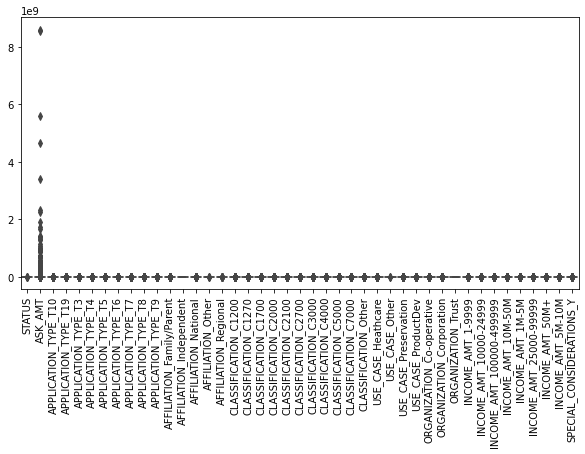

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
_,ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=X)

plt.xticks(rotation=90)

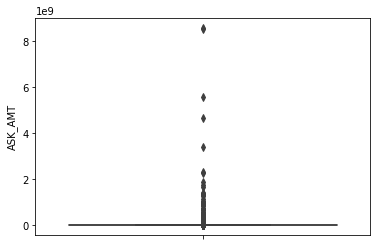

In [57]:
sns.boxplot(data=X, y='ASK_AMT')

ASK_AMT has outlier data that make it difficult to achieve higher model scores

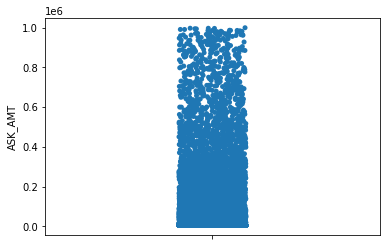

In [108]:
# remove outlier data from X, y

X_rm_outlier = X[X['ASK_AMT']<1e+6]
sns.stripplot(data=X_rm_outlier, y='ASK_AMT')

In [109]:

X_rm_outlier.shape

(32722, 43)

In [110]:
X.shape

(34299, 43)

In [111]:
y_rm_outlier = y[X_rm_outlier.index]
y_rm_outlier.shape

(32722,)

In [112]:


X_train,X_test,y_train,y_test = train_test_split(X_rm_outlier,y_rm_outlier,random_state=42)

In [113]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [120]:

nn = tf.keras.models.Sequential()

# First hidden layer
input_dim = len(X_rm_outlier.columns)
nn.add(tf.keras.layers.Dense(units=12, activation="relu", input_dim=input_dim))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="relu"))
nn.add(tf.keras.layers.Dense(units=8, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 12)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 713
Trainable params: 713
Non-trainable params: 0
_________________________________________________________________


In [121]:

nn.compile(loss='binary_crossentropy',optimizer='adam', metrics=["accuracy"])

In [122]:
model_fit = nn.fit(X_train_scaled,y_train, epochs=20)

Epoch 1/20
767/767 [==============================] - 2s 2ms/step - loss: 0.5981 - accuracy: 0.6941
Epoch 2/20
767/767 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7327
Epoch 3/20
767/767 [==============================] - 1s 1ms/step - loss: 0.5490 - accuracy: 0.7349
Epoch 4/20
767/767 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7357
Epoch 5/20
767/767 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7366
Epoch 6/20
767/767 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.7354
Epoch 7/20
767/767 [==============================] - 1s 1ms/step - loss: 0.5444 - accuracy: 0.7355
Epoch 8/20
767/767 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.7358
Epoch 9/20
767/767 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7367
Epoch 10/20
767/767 [==============================] - 1s 2ms/step - loss: 0.5429 - accuracy: 0.7367